In [74]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [75]:
start_date = '2023-12-11'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-11  End Date: 2024-12-1


In [76]:
ticker = 'PG'

df = yf.download(ticker, start=start_date, end=end_date)
df.head(15)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2023-12-11,142.277939,145.820007,145.869995,144.649994,144.800003,8471200
2023-12-12,142.395020,145.940002,146.229996,145.080002,145.860001,6069200
2023-12-13,144.970871,148.580002,148.649994,145.449997,145.860001,9055500
2023-12-14,141.146118,144.660004,148.550003,144.380005,148.460007,10565200
2023-12-15,140.463104,143.960007,144.250000,142.500000,143.179993,14549700
2023-12-18,142.619415,146.169998,147.490005,144.149994,144.169998,8421800
2023-12-19,142.619415,146.169998,146.339996,145.389999,145.669998,5233600
2023-12-20,140.414337,143.910004,146.070007,143.839996,145.570007,7663800


In [77]:
df1 = yf.download(ticker,start='2024-11-11',end=date.today())
df1 = df1['Close']
df1.columns = ['Close']
df1.shape

[*********************100%***********************]  1 of 1 completed


(30, 1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-12-11 to 2024-11-29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Adj Close, PG)  245 non-null    float64
 1   (Close, PG)      245 non-null    float64
 2   (High, PG)       245 non-null    float64
 3   (Low, PG)        245 non-null    float64
 4   (Open, PG)       245 non-null    float64
 5   (Volume, PG)     245 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.4 KB


In [79]:
df.isnull().sum()

Price      Ticker
Adj Close  PG        0
Close      PG        0
High       PG        0
Low        PG        0
Open       PG        0
Volume     PG        0
dtype: int64

In [80]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

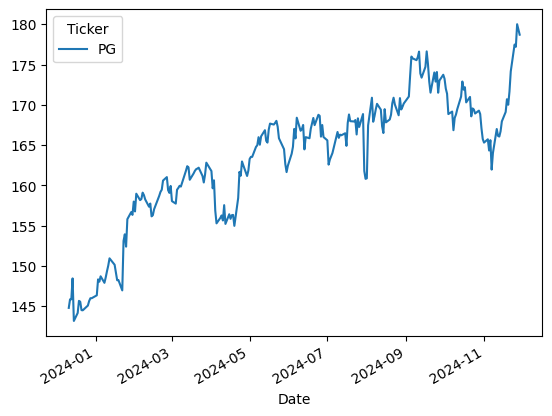

In [81]:
df['Open'].plot()

<Axes: xlabel='Date'>

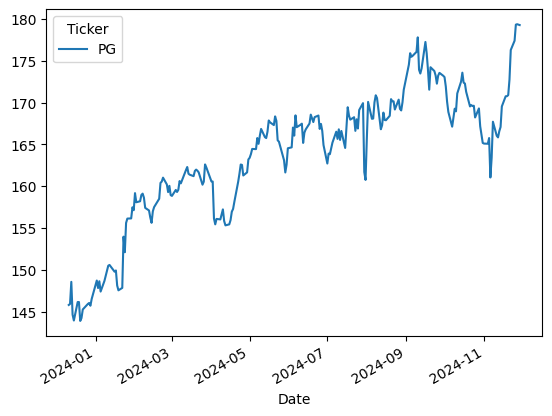

In [82]:
df['Close'].plot()

In [83]:
# df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
# df.head(14)
# df[['Close','Close Rolling 10']].plot()
# df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()
# df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
# df
# df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()
# #cummulative MOving average
# df['CMA']=df['Close'].expanding().mean()
# df
# df[['Close','CMA']].plot()

In [84]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [85]:
adf_test(df['Close'])

ADF Statistics: -1.71700013825657
p- value: 0.4223754638451059
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [86]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,First Difference
Ticker,PG,PG,PG,PG,PG,PG,
Date,,,,,,,
2023-12-11,142.277939,145.820007,145.869995,144.649994,144.800003,8471200,NaN
2023-12-12,142.395020,145.940002,146.229996,145.080002,145.860001,6069200,0.119995
2023-12-13,144.970871,148.580002,148.649994,145.449997,145.860001,9055500,2.639999
2023-12-14,141.146118,144.660004,148.550003,144.380005,148.460007,10565200,-3.919998
2023-12-15,140.463104,143.960007,144.250000,142.500000,143.179993,14549700,-0.699997


In [87]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -12.855996007455454
p- value: 5.230591254318112e-24
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

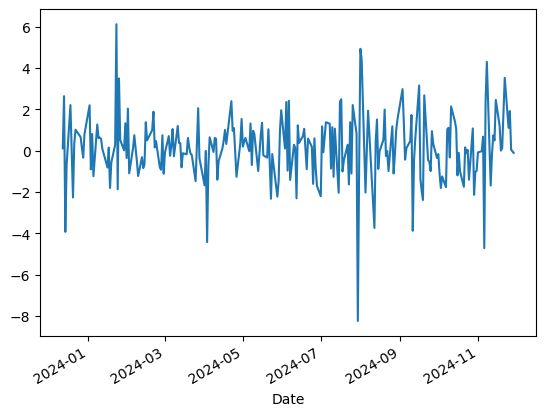

In [88]:
df['First Difference'].dropna().plot()

In [89]:
# df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)
# df
# Applying Auto_ARIMA
# step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
# step.summary()

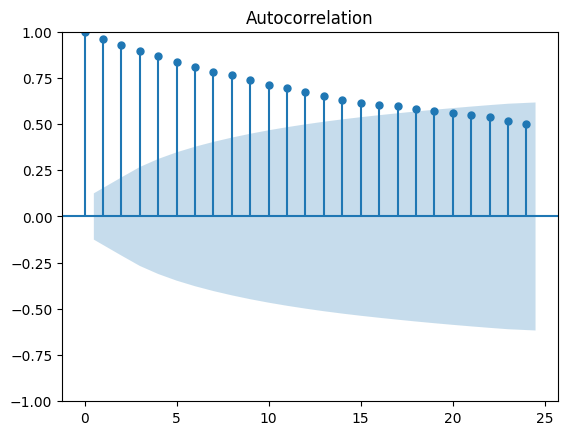

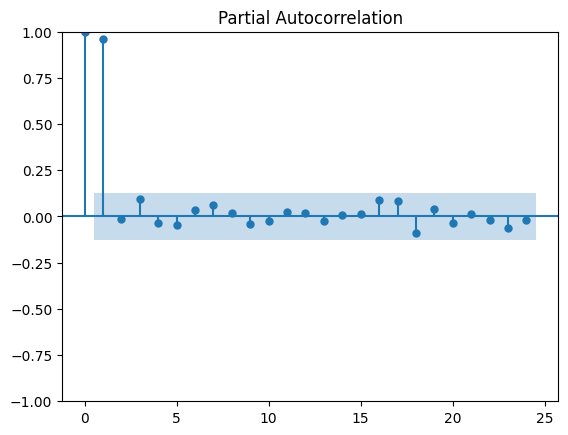

In [90]:
acf = plot_acf(df["Close"].dropna())
pacf = plot_pacf(df["Close"].dropna())

In [91]:
model_ARIMA=ARIMA(df['Close'],order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax

In [92]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PG   No. Observations:                  245
Model:                ARIMA(15, 2, 3)   Log Likelihood                -448.896
Date:                Tue, 24 Dec 2024   AIC                            935.792
Time:                        12:53:47   BIC                           1002.160
Sample:                             0   HQIC                           962.525
                                - 245                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6297      0.803     -2.029      0.042      -3.204      -0.056
ar.L2         -0.9654      0.768     -1.258      0.209      -2.470       0.539
ar.L3         -0.2308      0.185     -1.247      0.212      -0.593       0.132
ar.L4         -0.1015      0.214     -0.473      0.636      -0.522       0.319
ar.L5          0.0772      0.197      0.392      0.695      -0.309       0.463
ar.L6          0.0067      0.186      0.036      0.971      -0.357       0.370
ar.L7         -0.2073      0.183     -1.135      0.256      -0.565       0.151
ar.L8         -0.1619      0.243     -0.666      0.506      -0.639       0.315
ar.L9          0.0747      0.225      0.332      0.740      -0.366       0.515
ar.L10         0.1454      0.211      0.690      0.490      -0.268       0.558
ar.L11         0.0641      0.197      0.325      0.745      -0.323       0.451
ar.L12         0.0879      0.196      0.449      0.654      -0.296       0.472
ar.L13         0.0653      0.178      0.367      0.714      -0.283       0.414
ar.L14        -0.0190      0.177     -0.108      0.914      -0.365       0.327
ar.L15        -0.0245      0.141     -0.173      0.863      -0.302       0.253
ma.L1          0.6106      1.032      0.592      0.554      -1.412       2.634
ma.L2         -0.7905      0.875     -0.903      0.366      -2.506       0.925
ma.L3         -0.8191      0.834     -0.982      0.326      -2.454       0.816
sigma2         2.2977      1.228      1.871      0.061      -0.109       4.704
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               227.44
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.61
Prob(H) (two-sided):                  0.56   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2023,12,11),end=datetime(2024,11,29))

In [94]:
# residuals=df['Close']-pred_arima
# model_ARIMA_fit.resid.plot()
# model_ARIMA_fit.resid.plot(kind='kde')

In [95]:
df['Predicted_ARIMA']=pred_arima

<Axes: xlabel='Date'>

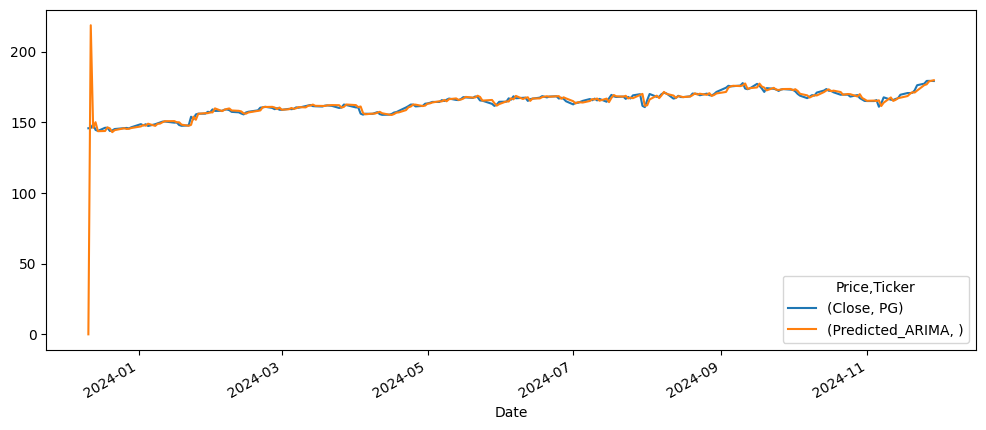

In [96]:
df[['Close','Predicted_ARIMA']].plot(figsize=(12,5))

In [97]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


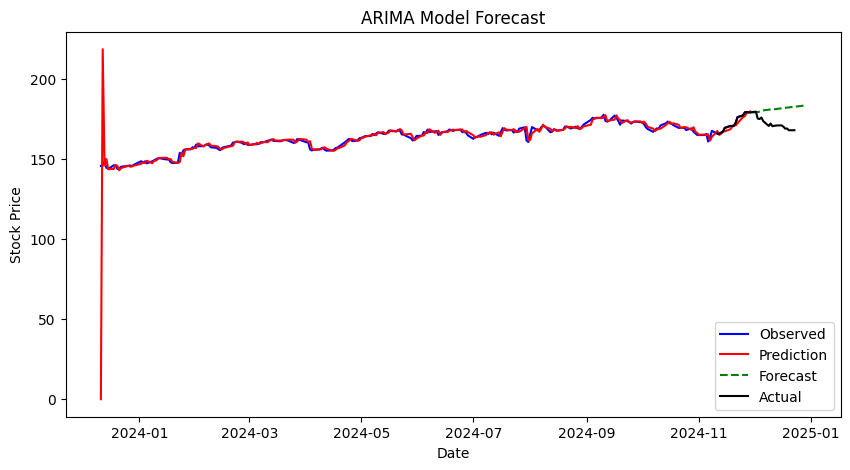

In [98]:
# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed',color='blue')
plt.plot(df['Predicted_ARIMA'],label= 'Prediction',color='red')

future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]

plt.plot(future_dates,forecast, label='Forecast', color='green',linestyle='--')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Calculating Prediction Accuracy

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [100]:
test_data = np.array(df['Close'].values)
test_data

array([[145.82000732],
       [145.94000244],
       [148.58000183],
       [144.66000366],
       [143.96000671],
       [146.16999817],
       [146.16999817],
       [143.91000366],
       [144.25999451],
       [145.27999878],
       [145.94000244],
       [146.05999756],
       [145.72999573],
       [146.53999329],
       [148.74000549],
       [147.83999634],
       [148.6499939 ],
       [147.41999817],
       [148.69000244],
       [149.30000305],
       [149.94000244],
       [150.50999451],
       [150.6000061 ],
       [149.78999329],
       [149.94000244],
       [148.13999939],
       [147.57000732],
       [147.86000061],
       [153.97999573],
       [152.11999512],
       [155.61999512],
       [156.13999939],
       [156.16000366],
       [157.49000549],
       [157.13999939],
       [159.17999268],
       [158.08999634],
       [158.21000671],
       [158.96000671],
       [159.11999512],
       [158.63999939],
       [157.41999817],
       [157.11000061],
       [156

In [101]:
test_data.shape,pred_arima.shape

((245, 1), (245,))

In [102]:
rmse = np.sqrt(mean_squared_error(test_data, pred_arima))
mean_actual = np.mean(test_data)

# Accuracy Calculation
accuracy = 100 - (rmse / mean_actual * 100)

print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

RMSE: 10.53
Accuracy: 93.56%


Calculating Forecasting Accuracy

In [103]:
future_actual_prices= np.array(df1['Close'])
future_actual_prices

array([166.02999878, 165.83999634, 166.58000183, 167.08000183,
       169.53999329, 170.75      , 170.75999451, 170.88999939,
       172.75      , 176.27999878, 177.38999939, 179.30999756,
       179.36000061, 179.25999451, 179.69999695, 175.41999817,
       175.11000061, 176.02999878, 173.82000732, 170.78999329,
       172.27999878, 170.63000488, 170.8500061 , 171.05999756,
       171.13999939, 170.33000183, 169.08000183, 169.19000244,
       168.05999756, 168.11000061])

In [104]:
future_forecast= np.array(forecast)
future_forecast

array([179.41815124, 179.27716109, 179.34486563, 179.47884984,
       179.71145917, 180.0578415 , 180.42866456, 180.71503783,
       180.73509162, 180.98359825, 180.99495852, 181.11102808,
       181.25855012, 181.31019963, 181.54171801, 181.65037953,
       181.82768773, 181.97471371, 182.10342603, 182.26564494,
       182.35326592, 182.52621701, 182.62602323, 182.77793811,
       182.9203958 , 183.03557184, 183.20808912, 183.31596787,
       183.47385519, 183.60102221])

In [105]:
df1['Close'].shape

(30,)

In [106]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_forecast = np.mean(np.abs((future_actual_prices - future_forecast) / future_actual_prices)) * 100

# Calculate accuracy
accuracy_forecast = 100 - mape_forecast

# Print results
print(f"Forecasting Accuracy: {accuracy_forecast:.2f}%")
print(f"MAPE for Forecasting: {mape_forecast:.2f}%")


Forecasting Accuracy: 94.47%
MAPE for Forecasting: 5.53%
